# Exploring Healthcare Costs

#### US Healthcare Costs
The US spends `$`3 trillion per year on healthcare and more per capita (`>$`9,000) than any other country. It spends about 18`%` of its GDP on healthcare which is 2 to 3 times more than other developed countries.

Various factors are attributed to this:
* high inpatient/outpatient treatment costs
* high administrative costs
* defensive medicine causing unnecessary treatments
* hospital consolidation causing monopolies
* medical billing codes becoming a business in itself to maximize revenue
* no negotiation mechanism for price control for private insurance
* providers can charge what the market will bear

#### Insurance categories
* Medicare - the federal health insurance program for people who are 65 or older, certain younger people with disabilities, and people with End-Stage Renal Disease
* Medicaid - a joint federal and state program that helps with medical costs for some people with limited income and resources
* Employer-sponsored or Group insurance
* Non-Group or Individual insurance
* Other Public coverage through the military or Veterans Administration
* Uninsured - includes those without health insurance


In this project, we will be exploring the summary **Medicare payment data** for the **top 100 DRGs** from 2011. The data is available [here](https://data.cms.gov/Medicare-Inpatient/Inpatient-Prospective-Payment-System-IPPS-Provider/97k6-zzx3) at the CMS website.

#### What is CMS?
The Centers for Medicare & Medicaid Services (CMS) is a federal agency within the United States Department of Health and Human Services (HHS) that administers the **Medicare program** and works in partnership with state governments to administer Medicaid, the State Children's Health Insurance Program (SCHIP), and health insurance portability standards.

#### What is DRG?
A Diagnosis-Related Group (DRG) is a statistical system of classifying any hospital hospital/inpatient stay into groups in order to facilitate payment of services. The DRG classification system divides possible diagnoses into more than 20 major body systems and subdivides them into almost 500 groups for the purpose of Medicare reimbursement. Each DRG is expected to have similar hospital resource use and hence comparable charges/payments.

#### Severity Tiers in DRGs
DRGs can have following Severity Tiers based on increasing complexity and cost of care and higher payments:
* DRG without CC or MCC
* DRG with CC (complication or comorbidity)
* DRG with MCC (major complication or comorbidity)  

For example, Heart Failure & Shock has the following three DRGs:
* 293 - HEART FAILURE & SHOCK W/O CC/MCC
* 292 - HEART FAILURE & SHOCK W CC
* 291 - HEART FAILURE & SHOCK W MCC

#### Objective
As part of this project we will be exploring a dataset from the CMS website containing inpatient charges and Medicare payments data for the Top 100 DRGs for FY2011. We will be creating visualizations to depict:
* variation in charges by providers for DRGs across states
* variation in Medicare payments to providers for DRGs across states
* variation in the overcharge (difference between charges and payments) for DRGs across states

## Introduction To The Data

**Inpatient Prospective Payment System (IPPS) Provider Summary for the Top 100 Diagnosis-Related Groups (DRG) - FY2011**  

The data includes hospital-specific charges for the more than **3,000 U.S. hospitals** that receive Medicare IPPS payments for the top 100 most frequently billed discharges, paid under Medicare based on a rate per discharge using the Medicare Severity Diagnosis Related Group (MS-DRG) for Fiscal Year (FY) 2011. These DRGs represent more than **7 million discharges** or 60 percent of total Medicare IPPS discharges.

Here are the descriptions for the relevant columns:

* `DRG Definition`: The code and description identifying the MS-DRG. MS-DRGs are a classification system that groups similar clinical conditions (diagnoses) and the procedures furnished by the hospital during the stay.
* `Provider Id`: The CMS Certification Number (CCN) assigned to the Medicare certified hospital facility.
* `Provider Name`: The name of the provider.
* `Provider Street Address`: The provider’s street address.
* `Provider City`: The city where the provider is located.
* `Provider State`: The state where the provider is located.
* `Provider Zip Code`: The provider’s zip code.
* `Provider HRR`: The Hospital Referral Region (HRR) where the provider is located.
* `Total Discharges`: The number of discharges billed by the provider for inpatient hospital services.
* `Average Covered Charges`: The provider's average charge for services covered by Medicare for all discharges in the MS-DRG. These will vary from hospital to hospital because of differences in hospital charge structures.
* `Average Total Payments`: The average total payments to all providers for the MS-DRG including the MSDRG amount, teaching, disproportionate share, capital, and outlier payments for all cases. Also included in average total payments are co-payment and deductible amounts that the patient is responsible for and any additional payments by third parties for coordination of benefits.
* `Average Medicare Payments`: The average amount that Medicare pays to the provider for Medicare's share of the MS-DRG. Average Medicare payment amounts include the MS-DRG amount, teaching, disproportionate share, capital, and outlier payments for all cases. Medicare payments DO NOT include beneficiary co-payments and deductible amounts nor any additional payments from third parties for coordination of benefits.



## Reading The Data

* Read the csv data set into a dataframe `ipps_drg`.
* Display the first few rows of `ipps_drg` and take a look at the data.
* Get row and columns counts.
* Get column names and data types.

In [1]:
# read csv file into dataframe
import pandas as pd
ipps_drg = pd.read_csv("data/health_DRG/IPPS_DRG_FY2011.csv")

In [2]:
print(ipps_drg.head())

                             DRG Definition  Provider Id  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10005   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10006   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10011   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10016   

                      Provider Name     Provider Street Address Provider City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET      FLORENCE   
3                 ST VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE    BIRMINGHAM   
4     SHELBY BAPTIST MEDICAL CENTER     1000 FIRST STREET NORTH     ALABASTER   

  Provider State  Provider Zip Code Hospital Referral Region Description  \
0             AL              36301                          AL - Dothan   


In [3]:
ipps_drg.shape

(163065, 12)

In [4]:
ipps_drg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
DRG Definition                          163065 non-null object
Provider Id                             163065 non-null int64
Provider Name                           163065 non-null object
Provider Street Address                 163065 non-null object
Provider City                           163065 non-null object
Provider State                          163065 non-null object
Provider Zip Code                       163065 non-null int64
Hospital Referral Region Description    163065 non-null object
 Total Discharges                       163065 non-null int64
 Average Covered Charges                163065 non-null object
 Average Total Payments                 163065 non-null object
Average Medicare Payments               163065 non-null object
dtypes: int64(3), object(9)
memory usage: 14.9+ MB



The following 3 columns are of object string type and contain `$` amounts. These will have to be converted to float.
  * `Average Covered Charges`
  * `Average Total Payments`
  * `Average Medicare Payments`

In addition to above columns, include the columns below in the dataframe for further analysis. The rest of the columns can be excluded.
* `DRG Definition`
* `Provider State`
* `Total Discharges`


## Cleaning The Data

* Retain only the columns required for analysis.
* Rename column names to shorter names without spaces.
* Strip the `$` character from the 3 amount columns that are of object type and convert them to float type.
* Add a new `overcharge` column that calculates the difference between average charges and average payments.
* Print the summary data.

In [9]:
cols_reqd = ['DRG Definition', 'Provider State', ' Total Discharges ',' Average Covered Charges ',
             ' Average Total Payments ','Average Medicare Payments']
ipps = ipps_drg[cols_reqd]

In [10]:
colnames_new = ['drg_defn', 'prov_st', 'tot_dischgs', 'avg_cov_chgs', 'avg_tot_pmnts', 'avg_med_pmnts']
ipps.columns = [colnames_new]

In [11]:
print(ipps.head())

                                   drg_defn prov_st  tot_dischgs avg_cov_chgs  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC      AL           91    $32963.07   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC      AL           14    $15131.85   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC      AL           24    $37560.37   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC      AL           25    $13998.28   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC      AL           18    $31633.27   

  avg_tot_pmnts avg_med_pmnts  
0      $5777.24      $4763.73  
1      $5787.57      $4976.71  
2      $5434.95      $4453.79  
3      $5417.56      $4129.16  
4      $5658.33      $4851.44  


In [18]:
amount_cols = ["avg_cov_chgs", "avg_tot_pmnts", "avg_med_pmnts"]
pd.options.mode.chained_assignment = None  # default='warn'

for col in amount_cols:
    ipps[col] = ipps[col].apply(lambda x: x.replace("$",''))
    ipps[col] = ipps[col].astype('float64')

In [21]:
ipps["overchg"] = ipps["avg_cov_chgs"] - ipps["avg_tot_pmnts"]
ipps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 7 columns):
drg_defn         163065 non-null object
prov_st          163065 non-null object
tot_dischgs      163065 non-null int64
avg_cov_chgs     163065 non-null float64
avg_tot_pmnts    163065 non-null float64
avg_med_pmnts    163065 non-null float64
overchg          163065 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 8.7+ MB


* Add 4 more columns to calculate the total amounts per row by multiplying the average amount by the no. of discharges.
* These columns will help get the correct overall average amounts.

In [53]:
ipps["tot_cov_chgs"] = ipps["tot_dischgs"] * ipps["avg_cov_chgs"]
ipps["tot_tot_pmnts"] = ipps["tot_dischgs"] * ipps["avg_tot_pmnts"]
ipps["tot_med_pmnts"] = ipps["tot_dischgs"] * ipps["avg_med_pmnts"]
ipps["tot_overchg"] = ipps["tot_cov_chgs"] - ipps["tot_tot_pmnts"]

In [54]:
print(ipps.head())

                                   drg_defn prov_st  tot_dischgs  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC      AL           91   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC      AL           14   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC      AL           24   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC      AL           25   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC      AL           18   

   avg_cov_chgs  avg_tot_pmnts  avg_med_pmnts   overchg  tot_cov_chgs  \
0      32963.07        5777.24        4763.73  27185.83    2999639.37   
1      15131.85        5787.57        4976.71   9344.28     211845.90   
2      37560.37        5434.95        4453.79  32125.42     901448.88   
3      13998.28        5417.56        4129.16   8580.72     349957.00   
4      31633.27        5658.33        4851.44  25974.94     569398.86   

   tot_tot_pmnts  tot_med_pmnts  tot_overchg  
0      525728.84      433499.43   2473910.53  
1       81025.98       69673.94    130819.92  
2      1304

In [55]:
ipps.describe()

,tot_dischgs,avg_cov_chgs,avg_tot_pmnts,avg_med_pmnts,overchg,tot_cov_chgs,tot_tot_pmnts,tot_med_pmnts,tot_overchg
count,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,1.630650e+05,1.630650e+05,1.630650e+05,1.630650e+05
mean,42.776304,36133.954224,9707.473804,8494.490964,26426.480420,1.508465e+06,4.089749e+05,3.554069e+05,1.099490e+06
std,51.104042,35065.365931,7664.642598,7309.467261,29533.381476,2.531100e+06,6.592961e+05,5.766743e+05,1.981250e+06
min,11.000000,2459.400000,2673.000000,1148.900000,-48254.990000,2.971892e+04,3.031193e+04,1.263790e+04,-6.900464e+06
25%,17.000000,15947.160000,5234.500000,4192.350000,9737.310000,3.841509e+05,1.215319e+05,1.001459e+05,2.321370e+05
50%,27.000000,25245.820000,7214.100000,6158.460000,17497.230000,7.828449e+05,2.255856e+05,1.915830e+05,5.293720e+05
75%,49.000000,43232.590000,11286.400000,10056.880000,32481.440000,1.663046e+06,4.513765e+05,3.930409e+05,1.206095e+06
max,3383.000000,929118.900000,156158.180000,154620.810000,798910.180000,1.796832e+08,6.435718e+07,5.034036e+07,1.153261e+08


## Understanding The Data In The Discharge And Amount Columns
* Create histograms for the discharge, charges, total payments and overcharges field.

### Discharges
* An important point to note is that the dataset contains **aggregated records** by provider, state and DRG. So the amount fields are the **average** for a particular provider in a particular state for a specific DRG.
* The total no. of discharges is 6,975,315.
* The Total Discharges range from 11 to 3383. Note that the CMS data set excludes aggregated records derived from 10 or fewer discharges to protect the privacy of Medicare beneficiaries.
* This column follows a positively skewed distribution based on histogram plot below with a few extremely high value outliers. The second histogram zooms in on the distribution of Discharge values under 150 to get a better sense of the data. Because there are no discharges in the 0-10 range in the data, the highest frequency bin range is 11-15.


In [72]:
# total no. of discharges considered in the dataset
total_discharges = ipps["tot_dischgs"].sum()
print(total_discharges)

6975318


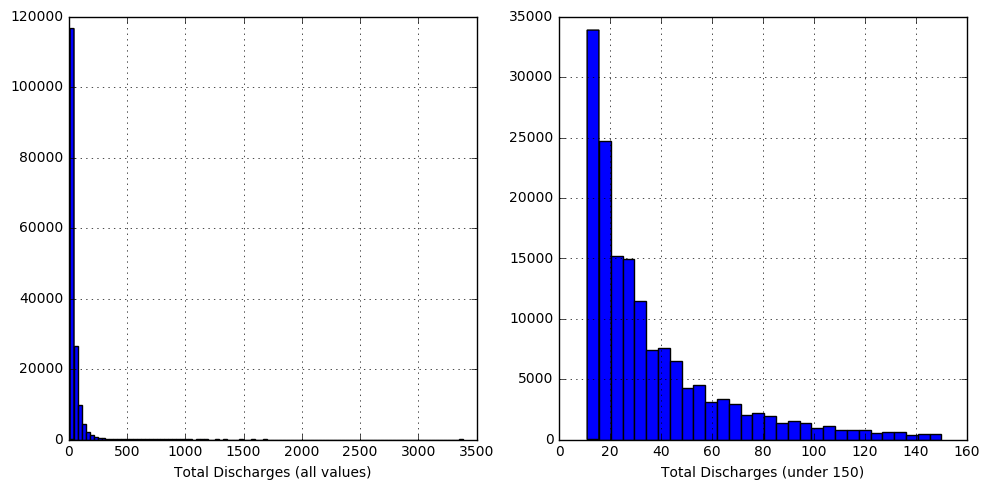

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(1, 2, figsize=(10, 5))

plt.subplot(1, 2, 1)
ipps["tot_dischgs"].hist(bins=100)
plt.xlabel("Total Discharges (all values)")

plt.subplot(1, 2, 2)
ipps[ipps["tot_dischgs"] <= 150]["tot_dischgs"].hist(bins=30)
plt.xlabel("Total Discharges (under 150)")
plt.tight_layout() #minimize overlap
plt.show()

### Charges
* The Average Covered Charge ranges from `$`2,459 to `$`929,000.
* This column follows a positively skewed distribution based on histogram plot below with a few extremely high value outliers. The second histogram zooms in on the distribution of Charge values under `$`200,000 to get a better sense of the data. The highest frequency bin range is `$`10,000-`$`15,000.
* Since we are dealing with aggregate values, the overall mean Average Covered Charge can be calculated by dividing the sum of all total charges by the total no. of discharges.
  * The total charges is about **`$`246 billion**.  
  * The average charge comes out to **`$`35,264**.

In [78]:
total_charges = ipps["tot_cov_chgs"].sum()
print("$",'{0:,.2f}'.format(total_charges))

mean_charges = total_charges / total_discharges
print("$", '{0:,.2f}'.format(mean_charges))

$ 245,977,881,549.87
$ 35,264.04


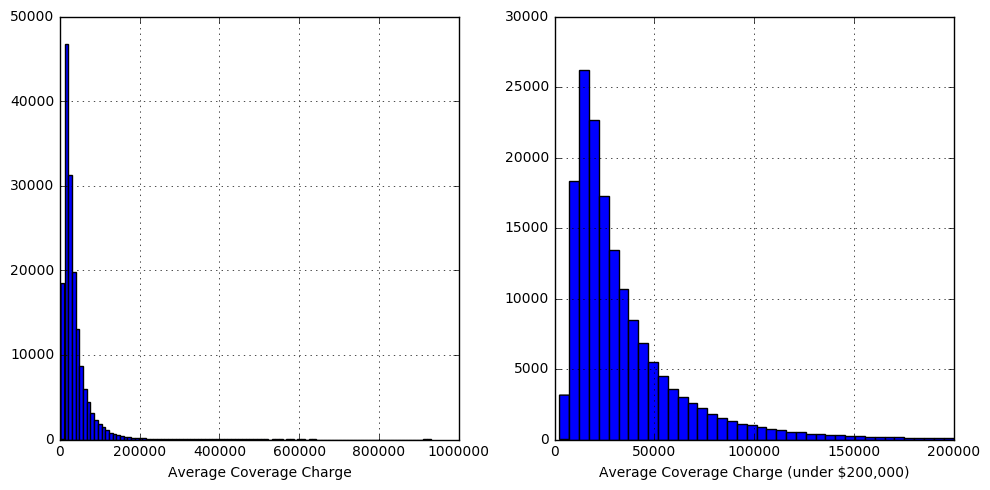

In [57]:
plt.subplots(1, 2, figsize=(10, 5))

plt.subplot(1, 2, 1)
ipps["avg_cov_chgs"].hist(bins=100)
plt.xlabel("Average Coverage Charge")

plt.subplot(1, 2, 2)
ipps[ipps["avg_cov_chgs"] <= 200000]["avg_cov_chgs"].hist(bins=40)
plt.xlabel("Average Coverage Charge (under $200,000)")
plt.tight_layout() #minimize overlap
plt.show()

### Payments
* The Average Total Payment ranges from `$`2,673 to `$`156,158.
* Again similar to the other columns, this column follows a positively skewed distribution based on histogram plot below with a few extremely high value outliers. The second histogram zooms in on the distribution of Charge values under `$`50,000 to get a better sense of the data. The highest frequency bin range is `$`4,000-`$`5,000.
* Since we are dealing with aggregate values, the overall mean Average Total Payment can be calculated by dividing the sum of all total payments by the total no. of discharges which comes out to **`$`9,560**.

* We can clearly see the huge discrepancy here. The charges are almost 4 times the payments.
  * mean charge of `$`35,264 versus mean payment of `$`9,560
  * total charges of **`$`246 billion** versus total payments of **`$`67 billion**
  
This demonstrates that providers tend to charge whatever they can for discharges even though the eventual payment amount is capped due to Medicare's price control.

In [79]:
total_payments = ipps["tot_tot_pmnts"].sum()
print("$",'{0:,.2f}'.format(total_payments))

mean_payments = total_payments / total_discharges
print("$", '{0:,.2f}'.format(mean_payments))

$ 66,689,493,035.86
$ 9,560.78


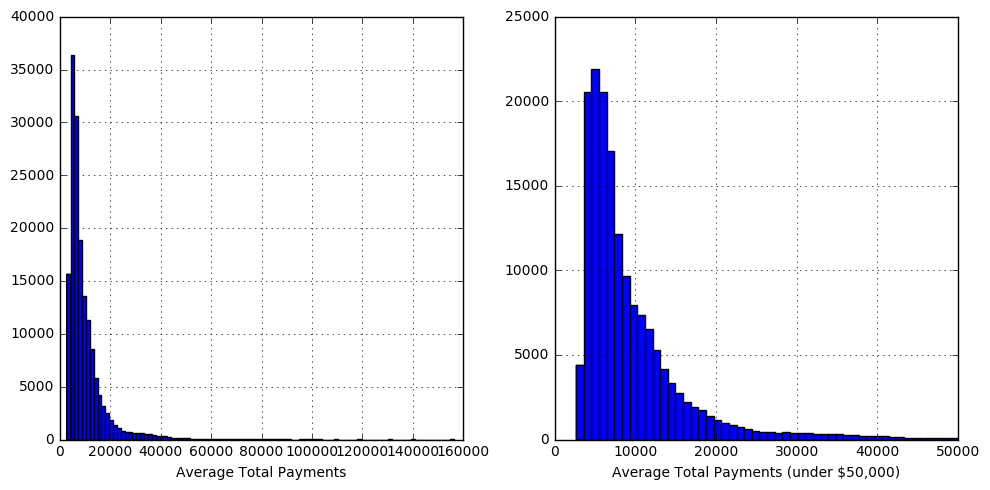

In [47]:
plt.subplots(1, 2, figsize=(10, 5))

plt.subplot(1, 2, 1)
ipps["avg_tot_pmnts"].hist(bins=100)
plt.xlabel("Average Total Payments")

plt.subplot(1, 2, 2)
ipps[ipps["avg_tot_pmnts"] <= 50000]["avg_tot_pmnts"].hist(bins=50)
plt.xlabel("Average Total Payments (under $50,000)")
plt.tight_layout() #minimize overlap
plt.show()

### Overcharge
* The Overcharge amount  ranges from -`$`48,255 to `$`798,910. Here the negative amounts will actually indicate "undercharging" i.e. amount charged is less than payment received.

* This column also follows a positively skewed distribution similar to the above columns with a few extremely high value outliers. The second histogram zooms in on the distribution of Charge values under `$`150,000 (including the negative values) to get a better sense of the data. The highest frequency bin range is `$`5,000-`$`10,000.
* Since we are dealing with aggregate values, the overall mean Overcharge can be calculated by taking the difference between total charges and total payments and dividing by the total no. of discharges which comes out to **`$`25,703**.
* The total overcharge amount is **`$`179 billion**.
* There are 583 rows with negative values for overcharge. This accounts for only 0.36`%` of the total data and most of it falls under the `$`0 to -`$`5000 range.

In [87]:
total_overcharges = ipps["tot_overchg"].sum()
print("$",'{0:,.2f}'.format(total_overcharges))

mean_overcharges = total_overcharges / total_discharges
print("$", '{0:,.2f}'.format(mean_overcharges))

undercharges = ipps[ipps["overchg"] <= 0]
print(len(undercharges))
print(len(undercharges)*100/ipps.shape[0])

$ 179,288,388,513.97
$ 25,703.26
583
0.3575261398828688


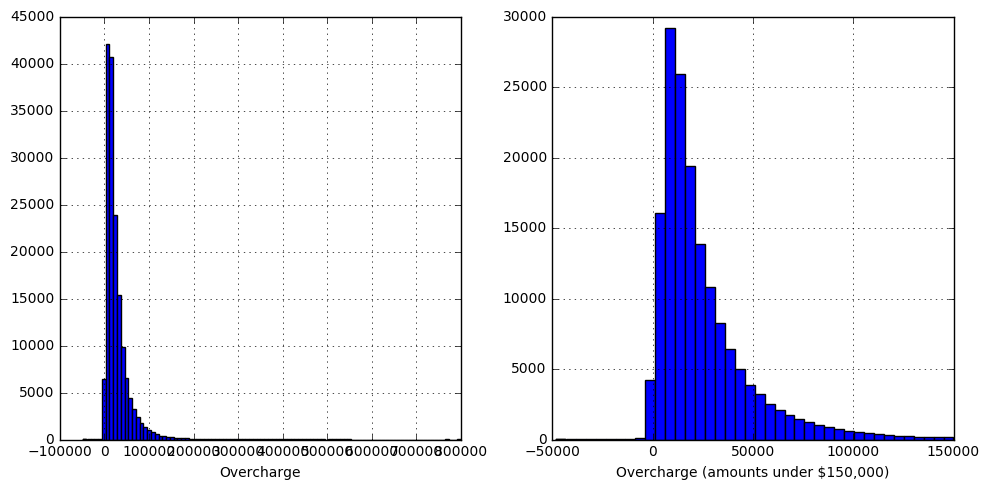

In [84]:
plt.subplots(1, 2, figsize=(10, 5))

plt.subplot(1, 2, 1)
ipps["overchg"].hist(bins=100)
plt.xlabel("Overcharge")

plt.subplot(1, 2, 2)
ipps[ipps["overchg"] <= 150000]["overchg"].hist(bins=40)
plt.xlabel("Overcharge (amounts under $150,000)")
plt.tight_layout() #minimize overlap
plt.show()

## Explore Relation Between Charges And Payments

* Create a scatter plot between average charges and average total payments.
* Set the axes for payments and charges with the same limits
* Draw a diagonal that indicates the degree of overcharge (distance above the diagonal).

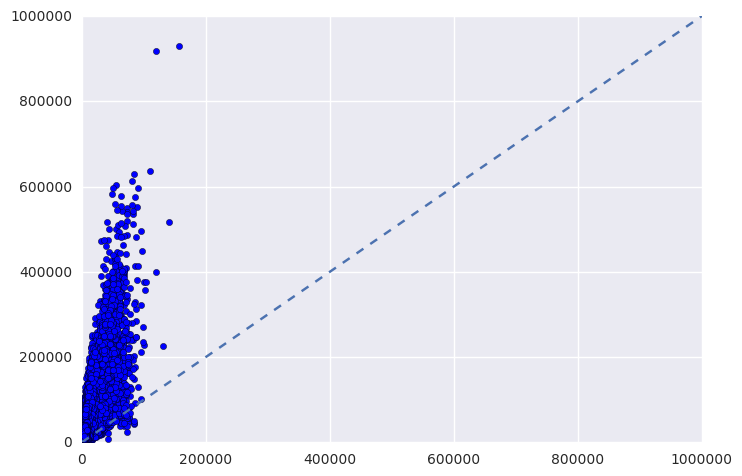

In [123]:
plt.scatter(ipps["avg_tot_pmnts"],ipps["avg_cov_chgs"])
plt.ylim(0, 1000000)
plt.xlim(0, 1000000)
plt.plot([0, 1000000],[0, 1000000], ls="--")
plt.show()

## Exploring Charges and Payments Variation for DRGs Across States
* The `ipps` dataframe has 163k rows for discharge data for 100 DRGs for 50 states + DC.
* We would like to see how the values for each DRG vary by state.
* Get the list of 51 territories (50 states and DC). We will be calling these 51 states going forward for simplicity. The state values will be used as the columns in grids.
* Get the list of the 100 DRG Definitions. These will be used as the rows in grids.
* We will create a grid of DRG vs State for the following 4 values with each cell containing the accumulated amounts:
  * Total Discharges
  * Average Covered Charges
  * Average Total Payments
  * Average Overcharges
* Once the grid is created, it can be used to generate heatmaps.

In [89]:
st_list = ipps["prov_st"].unique()
print(st_list)
print(len(st_list))

['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL' 'IN'
 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'TX' 'MO' 'MT' 'NE' 'NV'
 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN' 'UT'
 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']
51


In [91]:
drg_list = ipps["drg_defn"].unique()
print(drg_list[0:5])
print(len(drg_list))      

['039 - EXTRACRANIAL PROCEDURES W/O CC/MCC'
 '057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC'
 '069 - TRANSIENT ISCHEMIA'
 '064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC'
 '065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC']
100


These are the 4 dataframes for capturing total values per DRG per state
* `grid_dischgs` --- Total discharges for each DRG for each state
* `grid_cov_chgs` --- Total Covered Charges for each DRG for each state
* `grid_tot_pmnts` --- Total Payments for each DRG for each state
* `grid_overchg` --- Total Overcharges for each DRG for each state

In [92]:
grid_dischgs = pd.DataFrame(0, columns=st_list, index=drg_list)
grid_cov_chgs = pd.DataFrame(0.0, columns=st_list, index=drg_list)
grid_tot_pmnts = pd.DataFrame(0.0, columns=st_list, index=drg_list)
grid_overchg = pd.DataFrame(0.0, columns=st_list, index=drg_list)
for index, row in ipps.iterrows():
    grid_dischgs.loc[row["drg_defn"]][row["prov_st"]] += row["tot_dischgs"]
    grid_cov_chgs.loc[row["drg_defn"]][row["prov_st"]] += (row["avg_cov_chgs"] * row["tot_dischgs"])
    grid_tot_pmnts.loc[row["drg_defn"]][row["prov_st"]] += (row["avg_tot_pmnts"] * row["tot_dischgs"])
    grid_overchg.loc[row["drg_defn"]][row["prov_st"]] += (row["overchg"] * row["tot_dischgs"])

Create following 3 grids for capturing average Charges, Payments and Overcharges (per Discharge) per DRG per state
* `grid_cov_chgs_per_discharge` --- Average Charges for each DRG for each DRG
* `grid_tot_pmnts_per_discharge` --- Average Payments for each DRG for each DRG
* `grid_overchg_per_discharge` --- Average Overcharge for each DRG for each DRG

In [94]:
grid_cov_chgs_per_discharge = grid_cov_chgs / grid_dischgs
grid_tot_pmnts_per_discharge = grid_tot_pmnts / grid_dischgs
grid_overchg_per_discharge = grid_overchg / grid_dischgs

In [96]:
labels = []
for col in grid_dischgs.index:
    lbl = col[0:50]
    labels.append(lbl)
#print(labels)

## Explore Charges/Rates Variation Across DRGs And States

* Create heat maps to show absolute variations in Charges

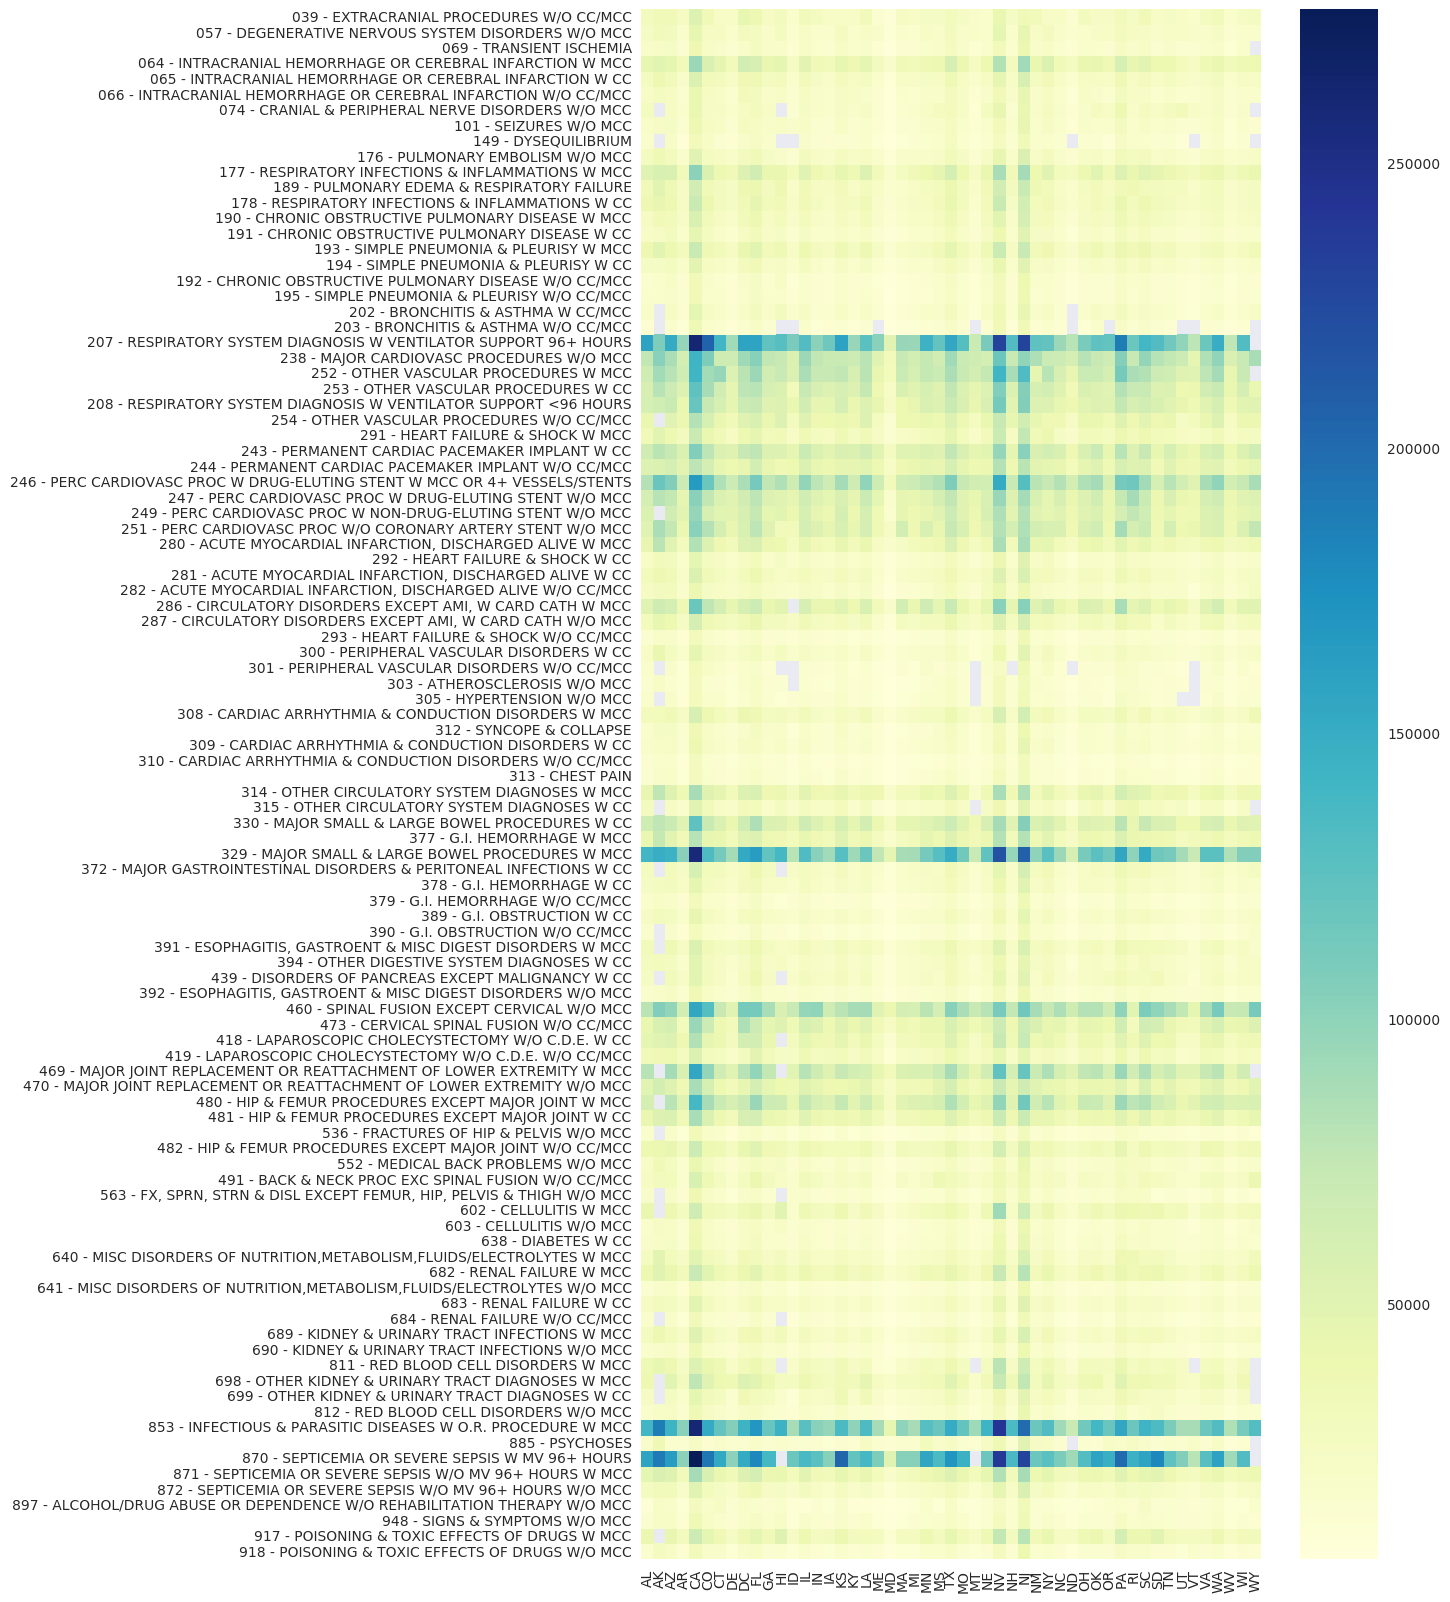

In [103]:
import seaborn as sns; sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(10, 20)
ax = sns.heatmap(grid_cov_chgs_per_discharge, cmap="YlGnBu") #linewidths=.5, cmap="YlGnBu", rasterized=False

Since the data here is in abolute terms, the heatmap can provide a basis for comparison of Charges between DRGs and between states.

* These are some of the DRGs with high average Charges (above `$`200,000) in many states:
  * 207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS
  * 329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC
  * 853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC
  * 870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS
    
* In terms of states, CA, NV and NJ have consistently darker shades compared to other states indicating comparatively higher average charges. MD has consistently low charges throughout even for the above 4 DRGs.

## Explore Payments Variation Across DRGs And States

* Create heat maps to show absolute variations in Payments

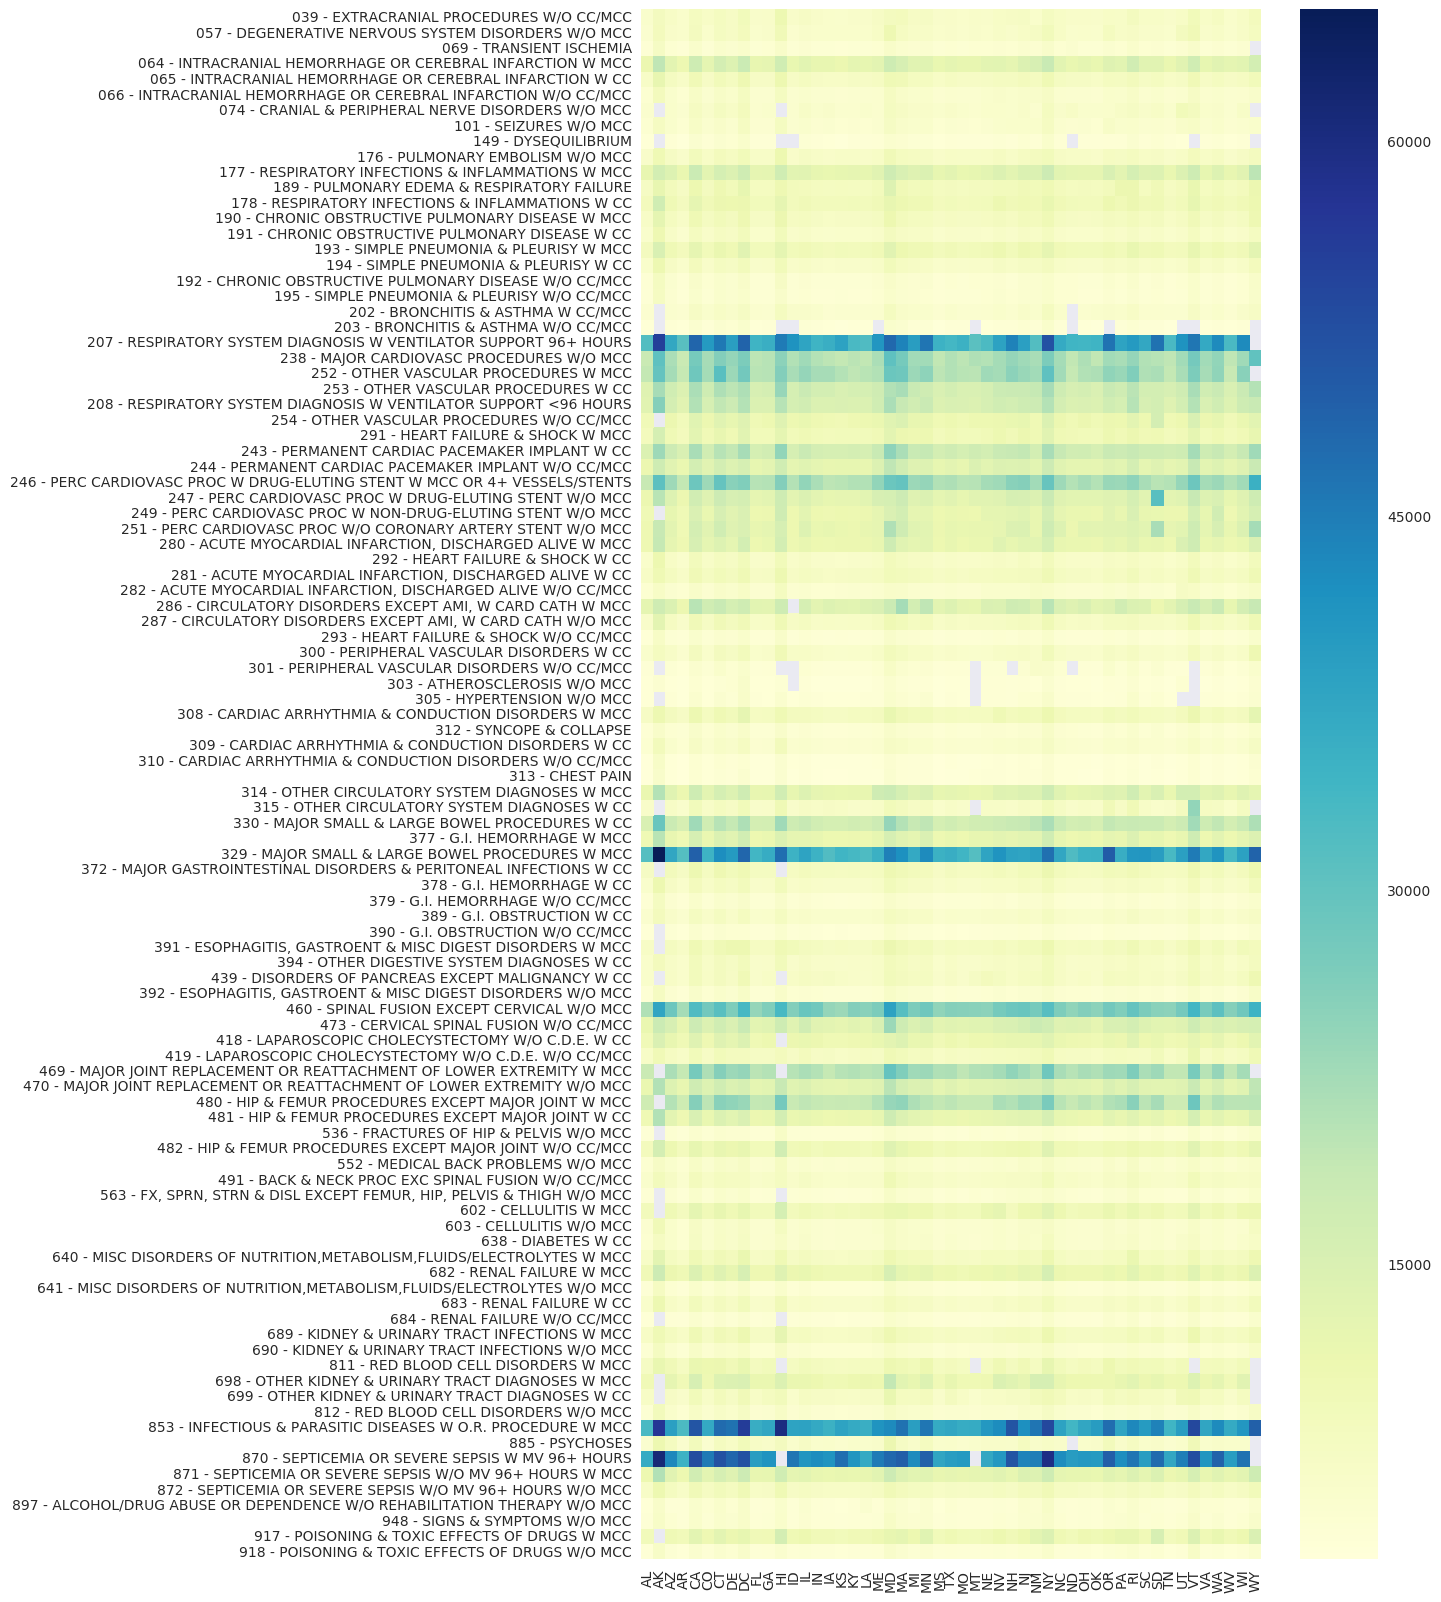

In [104]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 20)
ax = sns.heatmap(grid_tot_pmnts_per_discharge, cmap="YlGnBu") #linewidths=.5, 

* The same 4 DRGs show up with the  highest average payments as well.
  * 207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS
  * 329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC
  * 853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC
  * 870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS  

Compared to charges, the payments are consistent with far less variation across states. _This is expected given that administrative formulas dictate the Medicare payment amounts_. The rates are set and the variations across states are due to factors already considered in the Medicare's pricing standard.

Comparing the two heatmaps for Payments and Charges, we can see that there are states with lower charges which show similar or even higher payments than CA, NV and NJ. This is an indicator the overcharging could be more pronounced in these states. 

To get a clearer picture, we can compare charges with payments and map the charges/payment ratio for all DRGs.

## Explore Ratio of Charges to Payments

* To understand the extent of overcharging, we need to map the average Charges as a proportion of corresponding average Payments.
* Create a series that includes the mean payment for each DRG across all states.
* Create a grid by dividing each mean DRG charge value per state by the above mean payment.
* Create a heat map to show this ratio across DRGs and states.
  ** Ratio of 1 indicates that the charges submitted were equal to the Medicare payments.

In [113]:
mean_tot_pmnts = grid_tot_pmnts_per_discharge.mean(axis=1)
grid_rel_cov_chgs_per_discharge = grid_cov_chgs_per_discharge.div(mean_tot_pmnts, axis='rows')

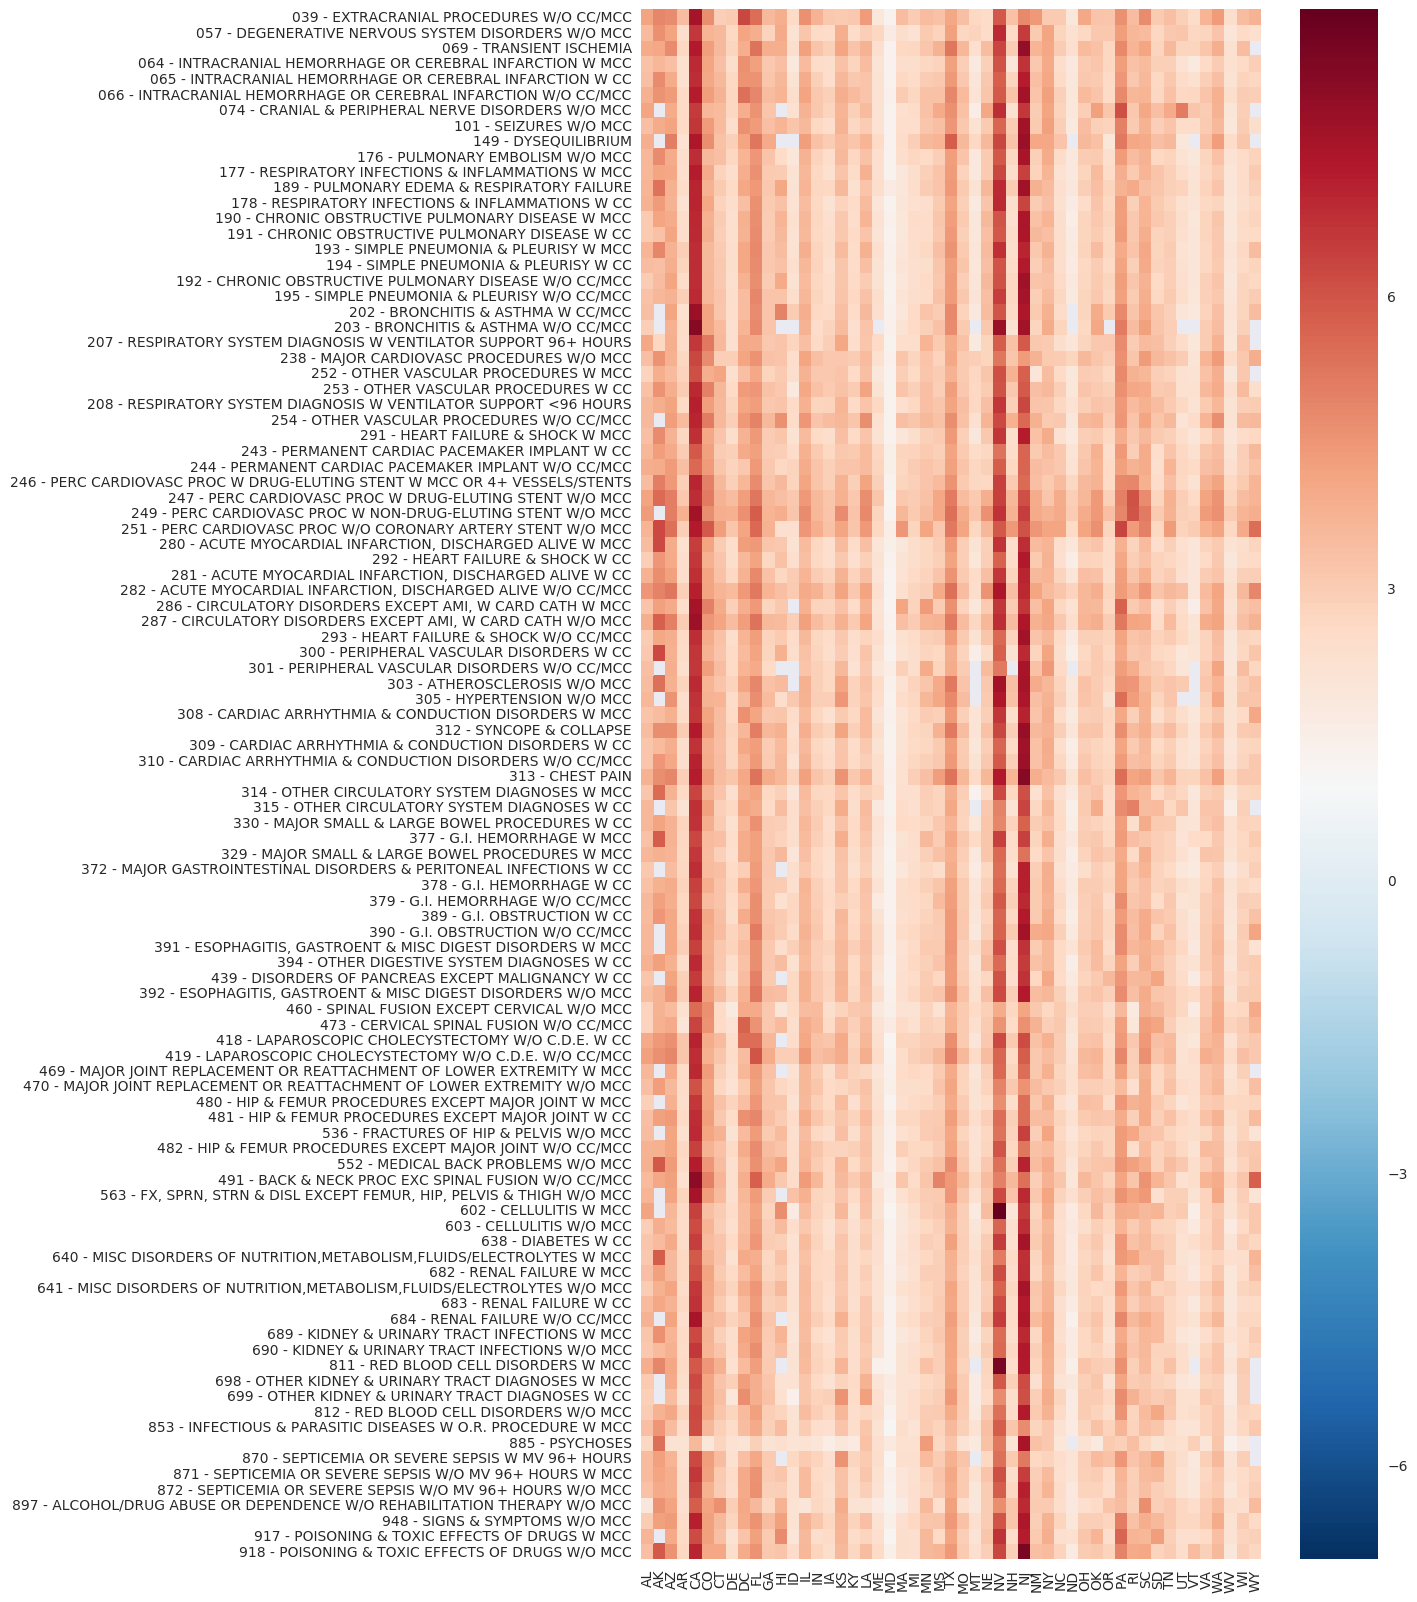

In [114]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 20)
ax = sns.heatmap(grid_rel_cov_chgs_per_discharge, center = 1.0) #linewidths=.5, cmap="YlGnBu"

* CA, NV and NJ are the states where providers are charging 6 to 9 times the set Medicare payment rates.
* MD is the only state where charges closely match payments.
* The rest of the states also show charges upto 3 times the payment.

### Why are the charges/rates so high in comparison to the Medicare payment?
* There is **no regulation of health care prices or hospital charges**. Hospitals can actually charge whatever they want for their services based on what they think the costs are or what their quality is. The prices do not reflect the actual value of the services that are being provided.

* The hospitals have a strong incentive to set sky high rates. These give the hospitals **leverage when they negotiate prices** with the insurers.

* These prices are **not real** and these amounts are not actually expected to be paid to the hospital for their service. So there are no actual dollars being lost.


### Impact on the various insurance categories

#### Medicare
Medicare sets their own rate, and it's almost always the lowest. There is a difference between what the hospital will pay Medicare and what they will pay if you have private health insurance. Medicare typically pays only 80`%` of what private insurers do.

#### Private Insurance
Private health insurers negotiate discounts with the providers and also do not pay anything near the hospital's top rate. Those adjusted rates or the negotiated rates i.e. the prices insurance companies really pay hospitals, are treated like trade secrets. Insurers and many hospitals do not want to reveal what they are paying.
  * Private insurer data - Data on private insurers' negotiated rates would provide significant insights on the healthcare costs. 
  * Crowdsourcing - There are some efforts to collect this data through [crowdsourcing](https://clearhealthcosts.com)  

A typical bill or Explanation Of Benefits (EOB) from the insurer will include the hospital's top rate. It will then include the negotiated or discounted rate which is the __actual amount to be paid for__. Typically the insurer will pay most of the negotiated rate and the rest is paid as out-of-pocket by the insured.


#### Uninsured
Uninsured people get stuck with bills with the top rate and will have far less bargaining power to get a discounted rate. These inflated rates can force an uninsured person to go into bankruptcy. The Charges heatmap showing state-wise variation becomes somewhat relevant to this uninsured population i.e. it would make a significant difference whether the uninsured is in a state like MD or from states like CA, NV or NJ.